In [1]:
import pandas as pd

# Load data from CSV files
pd_CS = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/CSUSHPISA.csv")
unemployment_data = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/UNRATE.csv")
interest_rates_data = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/FEDFUNDS.csv")
income = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/DSPIC96.csv")
per_capita_gdp = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/A939RX0Q048SBEA.csv")
housing_subsidy = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/L312051A027NBEA.csv")
household_units = pd.read_csv("C:/Users/atulp/Downloads/HOME LLC Assignment/HOUSTNSA.csv")
# ... Load other data files ...

# Merge data based on a common date column
merged_data = pd_CS.merge(unemployment_data, on='DATE', how='inner')
merged_data = merged_data.merge(interest_rates_data, on='DATE', how='inner')
merged_data = merged_data.merge(income, on='DATE', how='inner')
merged_data = merged_data.merge(per_capita_gdp, on='DATE', how='inner')
merged_data = merged_data.merge(housing_subsidy, on='DATE', how='inner')
merged_data = merged_data.merge(household_units, on='DATE', how='inner')
# ... Merge other data frames ...

# Sort data by date
merged_data.sort_values(by='DATE', inplace=True)

In [2]:
merged_data 

,DATE,CSUSHPISA,UNRATE,FEDFUNDS,DSPIC96,A939RX0Q048SBEA,L312051A027NBEA,HOUSTNSA
0,2004-01-01,141.646,5.7,1.00,10472.7,48633.0,27.201,124.5
1,2005-01-01,161.288,5.3,2.28,10670.3,50068.0,27.651,142.9
2,2006-01-01,182.320,4.7,4.29,11096.7,51200.0,28.604,153.0
3,2007-01-01,184.516,4.6,5.25,11403.7,51492.0,29.512,95.0
4,2008-01-01,173.132,5.0,3.94,11553.4,51740.0,29.876,70.8
5,2009-01-01,151.506,7.8,0.15,11718.0,49594.0,32.883,31.9
6,2010-01-01,147.395,9.8,0.11,11644.6,50036.0,32.669,38.9
7,2011-01-01,141.522,9.1,0.17,12084.4,50646.0,34.230,40.2
8,2012-01-01,136.608,8.3,0.08,12311.1,51559.0,33.283,47.2
9,2013-01-01,146.827,8.0,0.14,12258.9,51998.0,33.213,58.7


In [3]:
merged_data["DATE"] = pd.to_datetime(merged_data['DATE'])

In [4]:
merged_data["Year"] = pd.DatetimeIndex(merged_data["DATE"]).year
merged_data["Month"] = pd.DatetimeIndex(merged_data["DATE"]).month
merged_data.head()

,DATE,CSUSHPISA,UNRATE,FEDFUNDS,DSPIC96,A939RX0Q048SBEA,L312051A027NBEA,HOUSTNSA,Year,Month
0,2004-01-01,141.646,5.7,1.00,10472.7,48633.0,27.201,124.5,2004,1
1,2005-01-01,161.288,5.3,2.28,10670.3,50068.0,27.651,142.9,2005,1
2,2006-01-01,182.320,4.7,4.29,11096.7,51200.0,28.604,153.0,2006,1
3,2007-01-01,184.516,4.6,5.25,11403.7,51492.0,29.512,95.0,2007,1
4,2008-01-01,173.132,5.0,3.94,11553.4,51740.0,29.876,70.8,2008,1


In [5]:
# Dropping year and month columns
merged_data.drop(columns = ["Year", "Month"], inplace = True)

In [6]:
#Correlation
merged_data.corr()

,CSUSHPISA,UNRATE,FEDFUNDS,DSPIC96,A939RX0Q048SBEA,L312051A027NBEA,HOUSTNSA
CSUSHPISA,1.000000,-0.674783,0.266048,0.805004,0.868001,0.723248,0.482957
UNRATE,-0.674783,1.000000,-0.563377,-0.304754,-0.543040,-0.220350,-0.673770
FEDFUNDS,0.266048,-0.563377,1.000000,-0.293714,-0.069170,-0.368047,0.525005
DSPIC96,0.805004,-0.304754,-0.293714,1.000000,0.946105,0.971228,0.044727
A939RX0Q048SBEA,0.868001,-0.543040,-0.069170,0.946105,1.000000,0.902414,0.187209
L312051A027NBEA,0.723248,-0.220350,-0.368047,0.971228,0.902414,1.000000,-0.062303
HOUSTNSA,0.482957,-0.673770,0.525005,0.044727,0.187209,-0.062303,1.000000


In [7]:
merged_data.isna().sum()

DATE               0
CSUSHPISA          0
UNRATE             0
FEDFUNDS           0
DSPIC96            0
A939RX0Q048SBEA    0
L312051A027NBEA    0
HOUSTNSA           0
dtype: int64

In [8]:
merged_data.shape

(18, 8)

In [9]:
merged_data.head()

,DATE,CSUSHPISA,UNRATE,FEDFUNDS,DSPIC96,A939RX0Q048SBEA,L312051A027NBEA,HOUSTNSA
0,2004-01-01,141.646,5.7,1.00,10472.7,48633.0,27.201,124.5
1,2005-01-01,161.288,5.3,2.28,10670.3,50068.0,27.651,142.9
2,2006-01-01,182.320,4.7,4.29,11096.7,51200.0,28.604,153.0
3,2007-01-01,184.516,4.6,5.25,11403.7,51492.0,29.512,95.0
4,2008-01-01,173.132,5.0,3.94,11553.4,51740.0,29.876,70.8


In [10]:
merged_data.tail()

,DATE,CSUSHPISA,UNRATE,FEDFUNDS,DSPIC96,A939RX0Q048SBEA,L312051A027NBEA,HOUSTNSA
13,2017-01-01,186.800,4.7,0.65,13747.2,54866.0,35.771,82.3
14,2018-01-01,198.294,4.0,1.41,14173.9,56195.0,38.859,91.6
15,2019-01-01,206.495,4.0,2.40,14791.2,57100.0,40.185,87.0
16,2020-01-01,214.904,3.5,1.55,15149.7,57279.0,44.147,113.1
17,2021-01-01,239.413,6.3,0.09,17099.2,57882.0,45.296,115.2


In [11]:
from sklearn.model_selection import train_test_split

X = merged_data[['UNRATE', 'FEDFUNDS', 'DSPIC96', 'A939RX0Q048SBEA', 'L312051A027NBEA', 'HOUSTNSA']]
y = merged_data['CSUSHPISA']

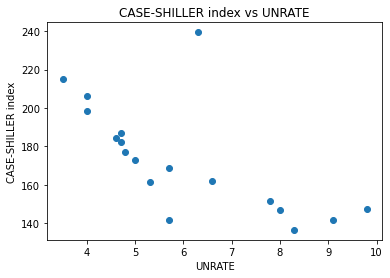

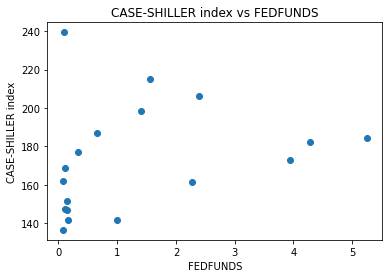

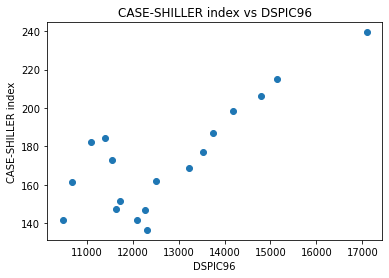

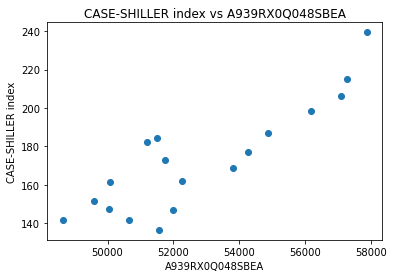

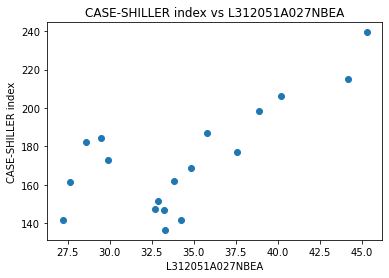

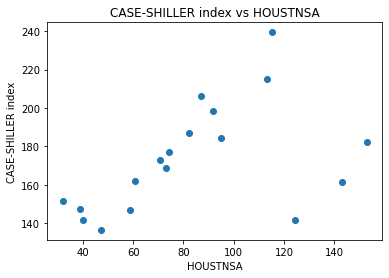

In [12]:
# Plotting scatter plots of the CASE-SHILLER index vs features
import matplotlib.pyplot as plt
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [15]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(pred, y_test)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9517710475385949


In [17]:
model1 = Ridge()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
score1 = r2_score(pred1, y_test)
print(score1)

0.9606739735533659


In [18]:
model2 = Lasso()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
score2 = r2_score(pred2, y_test)
print(score2)

0.97303201869103


In [19]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
score3 = r2_score(pred3, y_test)
print(score3)

0.8920218133361913


In [20]:
model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
score4 = r2_score(pred4, y_test)
print(score3)

0.8920218133361913


The best model is we found is Lasso Linear Regression Model

In [23]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = merged_data.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for DATE is -2.8390269533866452
The coefficient for CSUSHPISA is 8.56338164704765
The coefficient for UNRATE is 0.019834068456181075
The coefficient for FEDFUNDS is -0.00628783331109517
The coefficient for DSPIC96 is 1.6532909617287264
The coefficient for A939RX0Q048SBEA is 0.12299736649496507


In [24]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  191.7709049151089


In [25]:
# The intercept
print("The intercept is: ", model1.intercept_)

The intercept is:  164.11919019898826


In [26]:
# The intercept
print("The intercept is: ", model2.intercept_)

The intercept is:  92.83593372988281


# Key Factors

1) Unmployment Rate
2) Federal Funds Effective Rate
3) Income
4) Per Capita GDP 
5) Housing Subsidies(Federal)
6) Household Units

As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.

A few variables that could have been studied are below.

1) Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)

2) Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)

3) Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)